In [ ]:
# from sqlalchemy.sql.schema import Table
# from sqlalchemy.orm.query import Query
# from sqlalchemy.orm import Session
# from data.database import engine, Base, get_db
# import pandas as pd
# from data.models import t_tableau3_t2_tjfs_join_edl_dashadmin  # Import all models generated in models.py
# import sys
# from typing import List
# from utils.filter import high_level_filter_map
# from utils.utils import convert_query_to_df, extract_unique_values, create_filter_map, convert_filter_to_query
# from utils.utils_center_filter import *
# from typing import Dict, List

# import math
# import pandas as pd
# from typing import List, Any


# # Create the database tables (if they don't already exist)
# ## Total Test count: 31498

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D

In [2]:
df = pd.read_csv('lancet_tier.csv')
df

,condition_name,condition_level,condition_tier
0,Acute coronary syndrome,moderate,Secondary
1,Acute coronary syndrome,severe,Tertiary
2,Acute coronary syndrome,triage,Secondary
3,Antenatal care,triage,Primary
4,"Breast cancer, metastatic",moderate,Tertiary
5,"Breast cancer, metastatic",severe,Tertiary
6,"Breast cancer, metastatic",triage,Primary
7,COPD,moderate,Secondary
8,COPD,severe,Tertiary
9,COPD,triage,Primary


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# from matplotlib.lines import Line2D

# # Define the color mapping
# color_map = {
#     "triage": "lightyellow",
#     "moderate": "orange",
#     "severe": "brown",
#     "not applicable": "white"
# }

# # Define the tiers and conditions
# tiers = ["Primary", "Secondary", "Tertiary"]
# conditions = df["condition_name"].unique()

# # Create a mapping for condition levels to ensure specific order
# level_order = {"triage": 1, "moderate": 2, "severe": 3}

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(10, 8))

# # Draw the grid and rectangles
# for i, condition in enumerate(conditions):
#     for j, tier in enumerate(tiers):
#         # Get the condition levels for this cell
#         cell_data = df[(df["condition_name"] == condition) & (df["condition_tier"] == tier)]
        
#         if not cell_data.empty:
#             levels = sorted(cell_data["condition_level"].values, key=lambda x: level_order[x])
#             num_levels = len(levels)
#             for k, level in enumerate(levels):
#                 rect = patches.Rectangle(
#                     (j + k / num_levels, i), 1 / num_levels, 1,
#                     linewidth=1, edgecolor='black', facecolor=color_map[level]
#                 )
#                 ax.add_patch(rect)
#         else:
#             # Add an empty rectangle for "not applicable" cases
#             rect = patches.Rectangle(
#                 (j, i), 1, 1,
#                 linewidth=1, edgecolor='black', facecolor=color_map["not applicable"]
#             )
#             ax.add_patch(rect)

# # Set the axis limits and labels
# ax.set_xlim(0, len(tiers))
# ax.set_ylim(0, len(conditions))
# ax.set_xticks([0.5, 1.5, 2.5])
# ax.set_xticklabels(tiers)
# ax.set_xlabel("Health Facility Tier")
# ax.set_title("Condition Levels by Health Facility Tier")

# # Adjust y-tick positions to the center of each row
# ytick_positions = [i + 0.5 for i in range(len(conditions))]
# ax.set_yticks(ytick_positions)
# ax.set_yticklabels(conditions)
# ax.set_ylabel("Condition Name")

# # Create a custom legend
# legend_elements = [
#     Line2D([0], [0], color='lightyellow', lw=4, label='Triage'),
#     Line2D([0], [0], color='orange', lw=4, label='Moderate'),
#     Line2D([0], [0], color='brown', lw=4, label='Severe'),
#     Line2D([0], [0], color='white', lw=4, label='Not applicable')
# ]
# ax.legend(handles=legend_elements, title="Condition Level", loc='center left', bbox_to_anchor=(1, 0.5))

# # Show the plot
# plt.gca().invert_yaxis()
# plt.tight_layout(rect=[0, 0, 0.85, 1])
# plt.show()


In [3]:
def plot_condition_levels(df):
    # Define the color mapping
    color_map = {
        "triage": "lightyellow",
        "moderate": "orange",
        "severe": "brown",
        "not applicable": "white"
    }

    # Define the tiers and conditions
    tiers = ["Primary", "Secondary", "Tertiary"]
    conditions = df["condition_name"].unique()

    # Create a mapping for condition levels to ensure specific order
    level_order = {"triage": 1, "moderate": 2, "severe": 3}

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Draw the grid and rectangles
    for i, condition in enumerate(conditions):
        for j, tier in enumerate(tiers):
            # Get the condition levels for this cell
            cell_data = df[(df["condition_name"] == condition) & (df["condition_tier"] == tier)]
            
            if not cell_data.empty:
                levels = sorted(cell_data["condition_level"].values, key=lambda x: level_order[x])
                num_levels = len(levels)
                for k, level in enumerate(levels):
                    rect = patches.Rectangle(
                        (j + k / num_levels, i), 1 / num_levels, 1,
                        linewidth=1, edgecolor='black', facecolor=color_map[level]
                    )
                    ax.add_patch(rect)
            else:
                # Add an empty rectangle for "not applicable" cases
                rect = patches.Rectangle(
                    (j, i), 1, 1,
                    linewidth=1, edgecolor='black', facecolor=color_map["not applicable"]
                )
                ax.add_patch(rect)

    # Set the axis limits and labels
    ax.set_xlim(0, len(tiers))
    ax.set_ylim(0, len(conditions))
    ax.set_xticks([0.5, 1.5, 2.5])
    ax.set_xticklabels(tiers)
    ax.set_xlabel("Health Facility Tier")
    ax.set_title("Condition Levels by Health Facility Tier")

    # Adjust y-tick positions to the center of each row
    ytick_positions = [i + 0.5 for i in range(len(conditions))]
    ax.set_yticks(ytick_positions)
    ax.set_yticklabels(conditions)
    ax.set_ylabel("Condition Name")

    # Create a custom legend
    legend_elements = [
        Line2D([0], [0], color='lightyellow', lw=4, label='Triage'),
        Line2D([0], [0], color='orange', lw=4, label='Moderate'),
        Line2D([0], [0], color='brown', lw=4, label='Severe'),
        Line2D([0], [0], color='white', lw=4, label='Not applicable')
    ]
    ax.legend(handles=legend_elements, title="Condition Level", loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.gca().invert_yaxis()
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


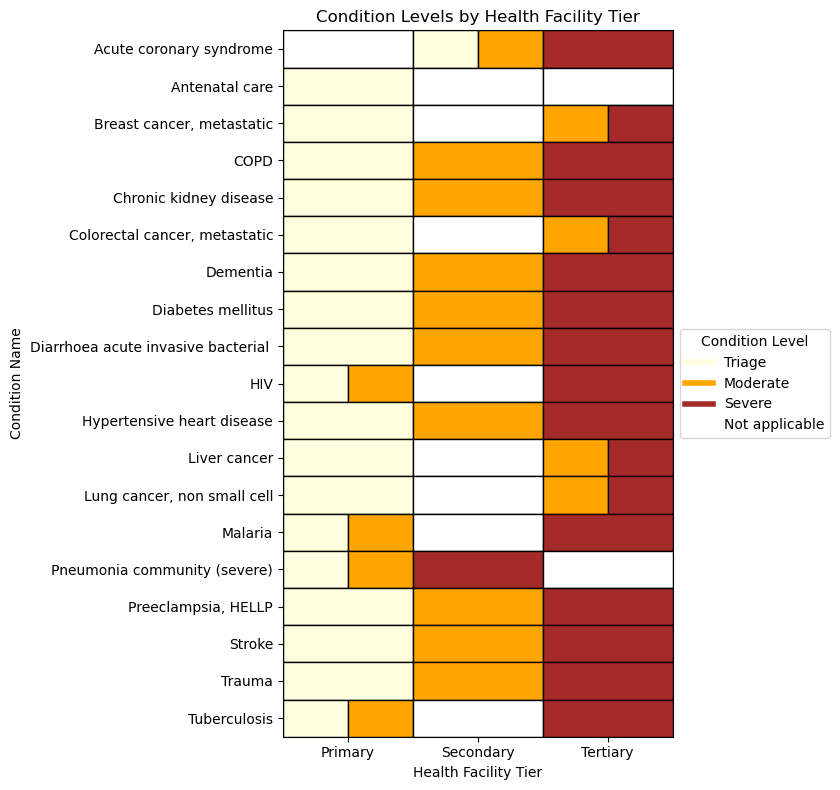

In [4]:
plot_condition_levels(df)

In [6]:
import matplotlib

In [7]:
matplotlib.__version__

'3.8.0'

In [10]:
df_dict = df.to_dict()

In [12]:
df_dict

{'condition_name': {0: 'Acute coronary syndrome',
  1: 'Acute coronary syndrome',
  2: 'Acute coronary syndrome',
  3: 'Antenatal care',
  4: 'Breast cancer, metastatic',
  5: 'Breast cancer, metastatic',
  6: 'Breast cancer, metastatic',
  7: 'COPD',
  8: 'COPD',
  9: 'COPD',
  10: 'Chronic kidney disease',
  11: 'Chronic kidney disease',
  12: 'Chronic kidney disease',
  13: 'Colorectal cancer, metastatic',
  14: 'Colorectal cancer, metastatic',
  15: 'Colorectal cancer, metastatic',
  16: 'Dementia',
  17: 'Dementia',
  18: 'Dementia',
  19: 'Diabetes mellitus',
  20: 'Diabetes mellitus',
  21: 'Diabetes mellitus',
  22: 'Diarrhoea acute invasive bacterial ',
  23: 'Diarrhoea acute invasive bacterial ',
  24: 'Diarrhoea acute invasive bacterial ',
  25: 'HIV',
  26: 'HIV',
  27: 'HIV',
  28: 'Hypertensive heart disease',
  29: 'Hypertensive heart disease',
  30: 'Hypertensive heart disease',
  31: 'Liver cancer',
  32: 'Liver cancer',
  33: 'Liver cancer',
  34: 'Lung cancer, non sm

In [13]:
print(pd.DataFrame(df_dict))

                         condition_name condition_level condition_tier
0               Acute coronary syndrome        moderate      Secondary
1               Acute coronary syndrome          severe       Tertiary
2               Acute coronary syndrome          triage      Secondary
3                        Antenatal care          triage        Primary
4             Breast cancer, metastatic        moderate       Tertiary
5             Breast cancer, metastatic          severe       Tertiary
6             Breast cancer, metastatic          triage        Primary
7                                  COPD        moderate      Secondary
8                                  COPD          severe       Tertiary
9                                  COPD          triage        Primary
10               Chronic kidney disease        moderate      Secondary
11               Chronic kidney disease          severe       Tertiary
12               Chronic kidney disease          triage        Primary
13    